In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [3]:
class LoanState(TypedDict):
    name: str
    amount_requested: float
    credit_score: int
    eligibile: bool
    interest_rate: float
    total_payable: float
    

In [5]:
def check_eligibility(state: LoanState) -> LoanState:
    if state["credit_score"] < 650:
        state["eligibile"] = False
    else:
        state["eligibile"] = True
    return state

In [6]:
def compute_interest(state: LoanState) -> LoanState:
    if not state["eligibile"]:
        state["interest_rate"] = 0.0
    elif state["credit_score"] >= 750:
        state["interest_rate"] = 0.05
    else:
        state["interest_rate"] = 0.1
    return state

In [7]:
def calculate_total_payable(state: LoanState) -> LoanState:
    state["total_payable"] = state["amount_requested"] * (1 + state["interest_rate"])
    return state

In [8]:
builder=StateGraph(LoanState)
builder.add_node("checek_eligibility", check_eligibility)
builder.add_node("compute_interest", compute_interest)
builder.add_node("calculate_total_payable", calculate_total_payable)
builder.add_edge(START, "checek_eligibility")
builder.add_edge("checek_eligibility", "compute_interest")
builder.add_edge("compute_interest", "calculate_total_payable")
builder.add_edge("calculate_total_payable", END)

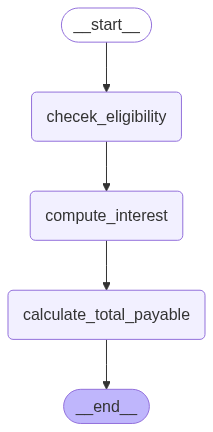

{'name': 'Alice', 'amount_requested': 100000, 'credit_score': 720, 'eligibile': True, 'interest_rate': 0.1, 'total_payable': 110000.00000000001}


In [9]:
graph= builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
# Step 5: Run an example input
input_data = {
    "name": "Alice",
    "amount_requested": 100000,
    "credit_score": 720
}

result = graph.invoke(input_data)
print(result)